In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook
# plt.rcParams["figure.figsize"] = [16, 8]

# Generate a spectrum
Create a mock spectrum with an H$\alpha$ ($\lambda = 1215\;\mathrm{Angstom}$) absorption feature with $f = 0.4164$, $b = 100\; \mathrm{km/s}$, and column density $n = 10^{14.66}\;\mathrm{cm^{-2}}$.

In [16]:
# Create a new model object, this will hold all of our lines and be responsible for generating the absorption spectrum.
spectrum_model1 = Absorption1D()

# Get a listing available pre-defined lines
from spectacle.core.registries import line_registry
line_registry

<Table length=329>
  name      wave   osc_str     gamma    
          Angstrom                      
  str9    float64  float64    float64   
-------- --------- -------- ------------
  HI1216 1215.6701   0.4164  626500000.0
  HI1026 1025.7223  0.07912  189700000.0
   HI973  972.5368    0.029   81270000.0
   HI950  949.7431  0.01394   42040000.0
   HI938  937.8035 0.007799   24500000.0
   HI931  930.7483 0.004814   12360000.0
   HI926  926.2257 0.003183    8255000.0
   HI923  923.1504 0.002216    5785000.0
   HI921  920.9631 0.001605    4210000.0
     ...       ...      ...          ...
NiII1455  1454.842   0.0323  102000000.0
NiII1393  1393.324   0.0101   34700000.0
NiII1370  1370.131   0.0769  410000000.0
NiII1317  1317.217  0.07786  420500000.0
CuII1368 1367.9509    0.179  623000000.0
CuII1359  1358.773   0.3803  720000000.0
ZnII2063  2062.664    0.256  386000000.0
ZnII2026  2026.136    0.489  407000000.0
GeII1602 1602.4863   0.1436  990600000.0
GaII1414  1414.402      1.8 1970000000

## Add lines

In [4]:
# Add a line by name
spectrum_model1.add_line(name="NV1239", v_doppler=2.5e7, column_density=10**14.66)

# Add line explicitly
spectrum_model1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=2.5e7, column_density=10**14.66, gamma=6.2650000e+08)

<Voigt1D(lambda_0=1215.6701, f_value=0.4164, gamma=626500000.0, v_doppler=25000000.0, column_density=457088189614875.2, delta_v=0.0, delta_lambda=0.0, name='HI1216')>

## Create spectrum

{'NV1239': 1238.8209999999999, 'HI1216': 1215.6701}


<IPython.core.display.Javascript object>


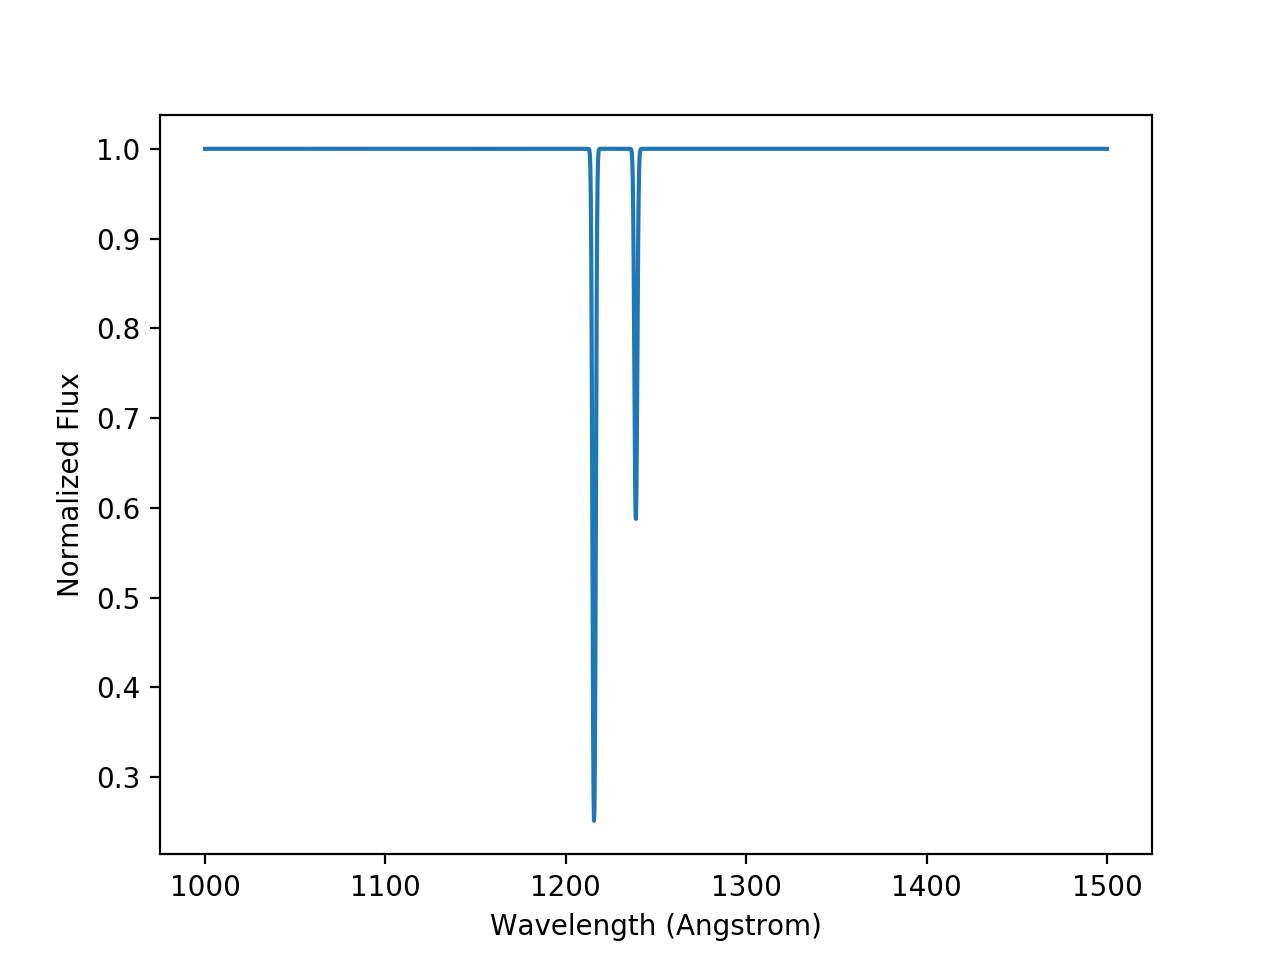

In [15]:
# Define the wavelength range, and then create the spectrum
dispersion = np.linspace(1000, 1500, 2000)
spectrum1 = spectrum_model1(dispersion)

# The spectrum also contains basic information about where the lines are
print(spectrum1.lines)

# Plot the spectrum
f, (ax) = plt.subplots()

ax.plot(spectrum1.dispersion, spectrum1.data)
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

plt.show()

## Apply noise to the spectrum

<IPython.core.display.Javascript object>


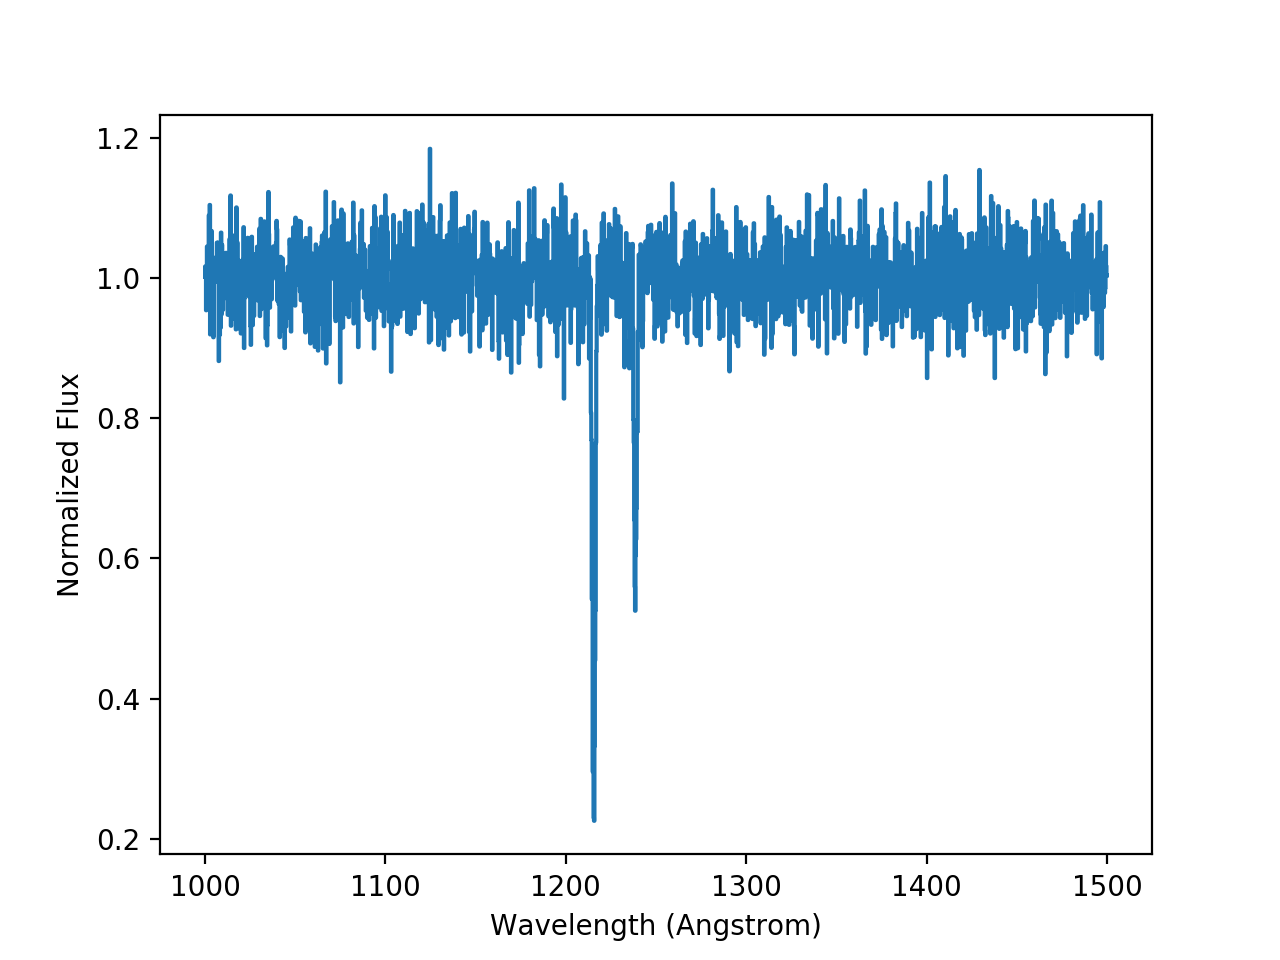

In [6]:
# Add noise
spectrum1.add_noise(std_dev=0.05)

# Plot resultant spectrum
f, (ax) = plt.subplots()

ax.plot(spectrum1.dispersion, spectrum1.data, drawstyle='steps')
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

## Apply the COS LSF

<IPython.core.display.Javascript object>


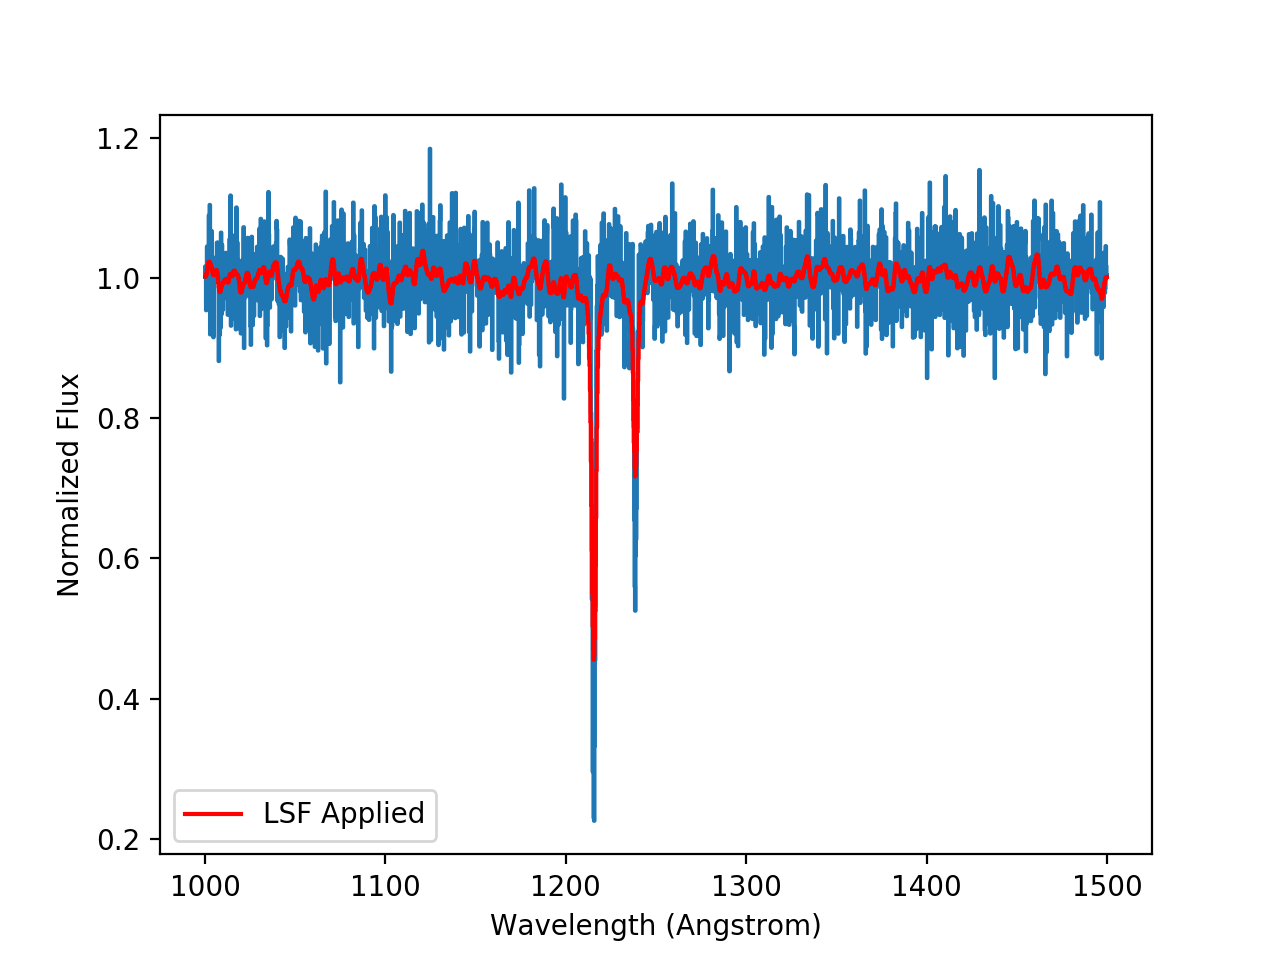

In [7]:
f, (ax) = plt.subplots()

# Plot the current, un-convolved spectrum
ax.plot(spectrum1.dispersion, spectrum1.data, drawstyle='steps')

# Create and add the LSF to the spectrum object
cos_lsf = COSLSF()
spectrum1.add_lsf(cos_lsf)

# Plot the new, convolved spectrum
ax.plot(spectrum1.dispersion, spectrum1.data, drawstyle='steps', color='r', label="LSF Applied")
ax.set_xlabel("Wavelength (Angstrom)")
ax.set_ylabel("Normalized Flux")

plt.legend(loc=0)

## Resampling

Provide a dispersion with a lower samping and project the spectrum onto this wavelength grid.

<IPython.core.display.Javascript object>


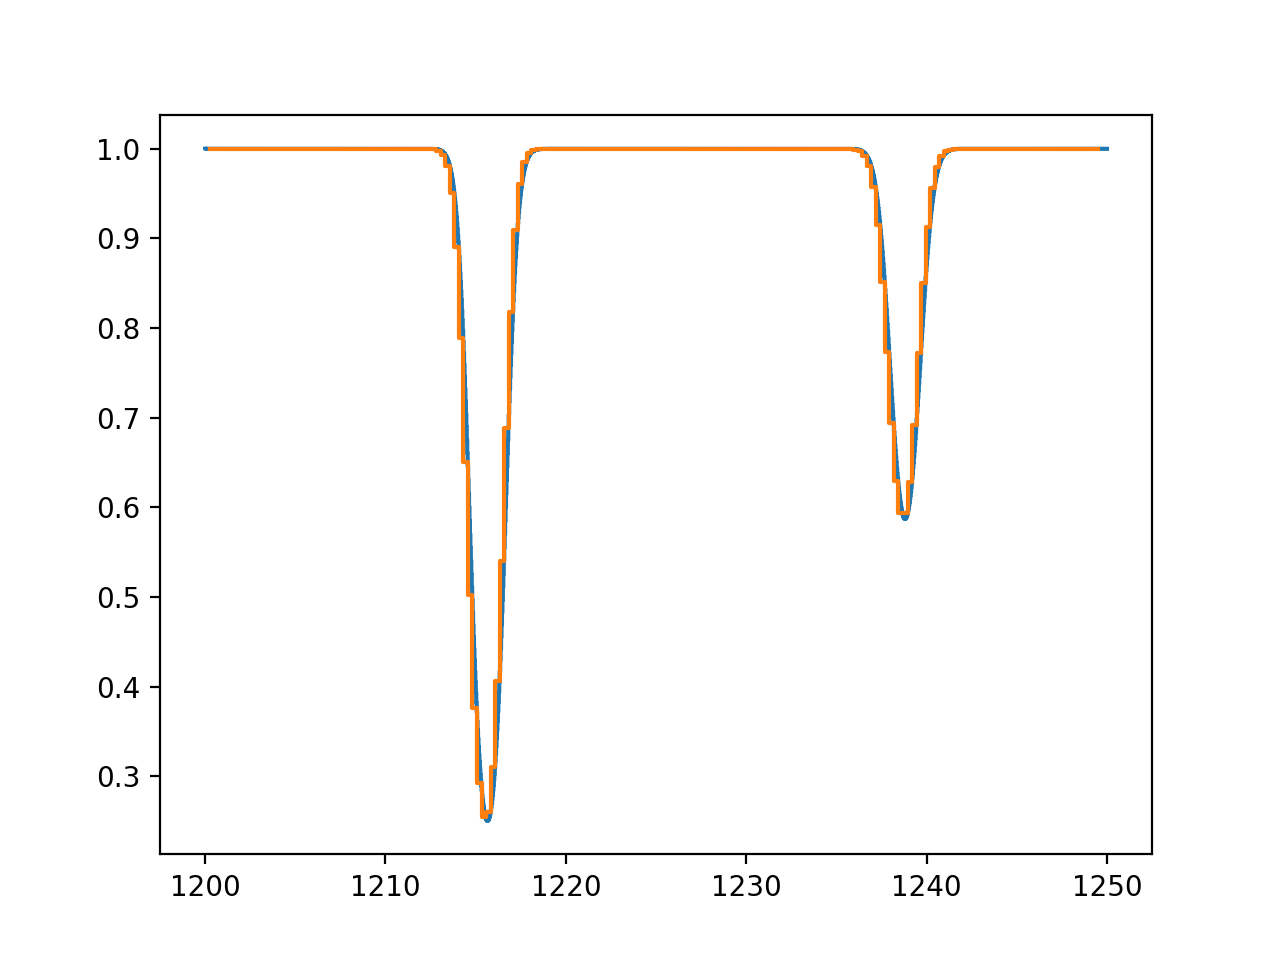

In [37]:
# Original spectrum
spectrum_model1 = Absorption1D()

spectrum_model1.add_line(name="NV1239", v_doppler=2.5e7, column_density=10**14.66)
spectrum_model1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=2.5e7, 
                         column_density=10**14.66, gamma=6.2650000e+08)

dispersion = np.linspace(1200, 1250, 2000)
spectrum1 = spectrum_model1(dispersion)

# Resample to lower grid
new_spectrum = spectrum1.resample(np.linspace(1200, 1250, 200))

f, ax = plt.subplots()

ax.step(spectrum1.dispersion, spectrum1.data)

# TODO: some unresolved artifacts require some special treatment...
inds = np.argsort(new_spectrum.dispersion)
ax.step(new_spectrum.dispersion[inds][4:-1], new_spectrum.data[inds][4:-1])

# Velocity space

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:69: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


<IPython.core.display.Javascript object>


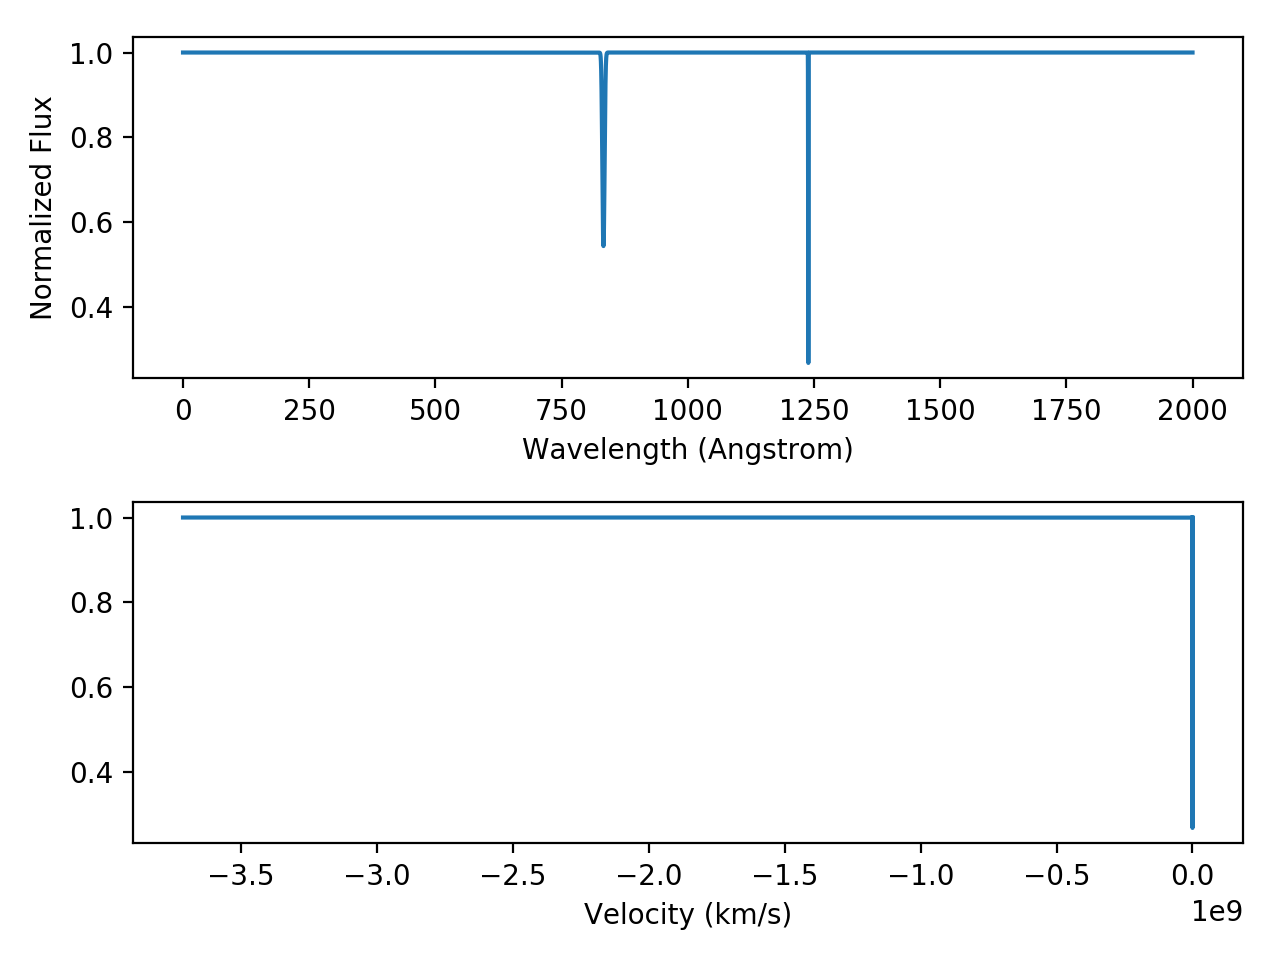

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/astropy/units/quantity.py:951: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


In [8]:
spectrum_model = Absorption1D()
spectrum_model.add_line(name="NV1239", v_doppler=1e7, column_density=10**14.66, delta_v=0)
spectrum_model.add_line(name="OIII833", v_doppler=1e8, column_density=10**15.66, delta_v=0)

spectrum = spectrum_model(np.linspace(0, 2000, 20000))

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(spectrum.dispersion, spectrum.data)
ax2.plot(spectrum.velocity(1.23882100E+03), spectrum.data)

ax1.set_ylabel("Normalized Flux")
ax1.set_xlabel("Wavelength (Angstrom)")
ax2.set_xlabel("Velocity (km/s)")

plt.tight_layout()